In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('student.csv')

In [4]:
categorical_columns = ['Sex', 'High_School_Type', 'Scholarship', 'Additional_Work',
                       'Sports_activity', 'Transportation', 'Attendance',
                       'Reading', 'Notes', 'Listening_in_Class', 'Project_work']

In [5]:
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))

In [6]:
X = df.drop(['Id', 'Grade'], axis=1)
y = df['Grade']

In [7]:
y = le.fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}


In [11]:
grid_search = GridSearchCV(SVC(), param_grid, refit=True,
                            verbose=2, cv=5)
grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [12]:
svm_model = grid_search.best_estimator_




In [13]:
y_pred = svm_model.predict(X_test_scaled)

In [14]:
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}


In [15]:
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred,
                            target_names=le.classes_))


SVM Classification Report:
              precision    recall  f1-score   support

          AA       0.12      1.00      0.22         3
          BA       0.00      0.00      0.00         4
          BB       0.50      0.17      0.25         6
          CB       0.00      0.00      0.00         3
          CC       0.00      0.00      0.00         3
          DC       0.00      0.00      0.00         4
          DD       0.33      0.50      0.40         2
        Fail       0.00      0.00      0.00         4

    accuracy                           0.17        29
   macro avg       0.12      0.21      0.11        29
weighted avg       0.14      0.17      0.10        29



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


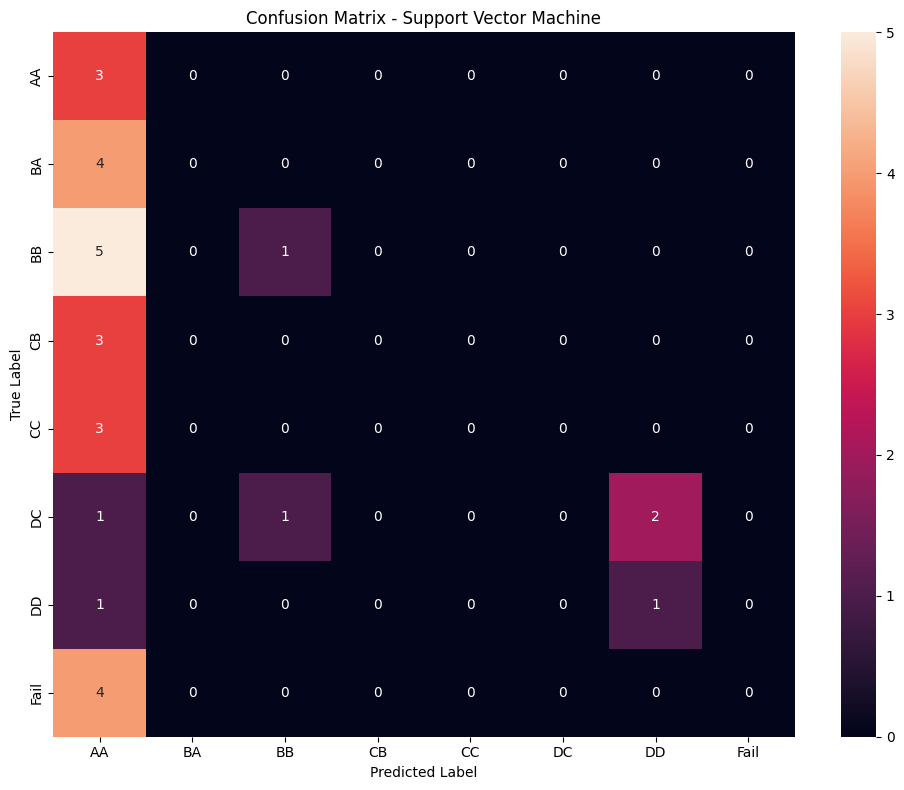

In [16]:
plt.figure(figsize=(10,8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix - Support Vector Machine')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [24]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# Create a new SVC estimator with a linear kernel
linear_svm = SVC(kernel='linear')

# Use the linear SVC estimator in RFE
rfe_selector = RFE(estimator=linear_svm, n_features_to_select=10)
rfe_selector = rfe_selector.fit(X_train_scaled, y_train)


In [25]:
feature_ranking = pd.DataFrame({
    'feature': X.columns,
    'ranking': rfe_selector.ranking_
})
feature_ranking = feature_ranking.sort_values('ranking')

print("\nTop 10 Most Important Features:")
print(feature_ranking.head(10))


Top 10 Most Important Features:
               feature  ranking
0           Unnamed: 0        1
1          Student_Age        1
2                  Sex        1
3     High_School_Type        1
4          Scholarship        1
6      Sports_activity        1
8   Weekly_Study_Hours        1
9           Attendance        1
11               Notes        1
13        Project_work        1


<Figure size 1000x600 with 0 Axes>

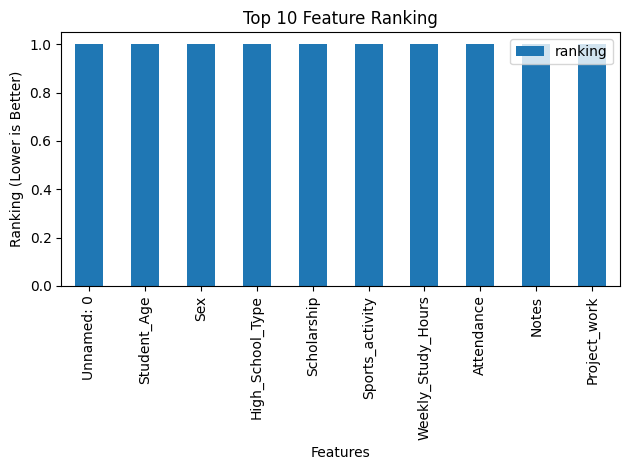

In [26]:
plt.figure(figsize=(10,6))
feature_ranking.head(10).plot(x='feature', y='ranking', kind='bar')
plt.title('Top 10 Feature Ranking')
plt.xlabel('Features')
plt.ylabel('Ranking (Lower is Better)')
plt.tight_layout()
plt.show()